In [2]:
import pandas as pd
import numpy as np
import os
import ast

In [3]:
homicidios_df = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')
victimas_df = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')

In [4]:
homicidios_df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
homicidios_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [6]:
homicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [7]:
homicidios_df.duplicated().sum()

0

In [8]:
homicidios_df.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [9]:
homicidios_df.isnull()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
692,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
693,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
694,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [10]:
homicidios_df[homicidios_df['HH']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [11]:
homicidios_df['HH'] = pd.to_numeric(homicidios_df['HH'], errors='coerce')

In [12]:
homicidios_df.at[518, 'HH'] = int(round(homicidios_df['HH'].mean()))

In [13]:
homicidios_df['HH'] = homicidios_df['HH'].astype(int)

In [14]:
homicidios_df.at[518, 'HORA'] = pd.to_datetime('12:00:00').time()

In [15]:
homicidios_df.iloc[518]

ID                                                    2019-0103
N_VICTIMAS                                                    1
FECHA                                       2019-12-18 00:00:00
AAAA                                                       2019
MM                                                           12
DD                                                           18
HORA                                                   12:00:00
HH                                                           12
LUGAR_DEL_HECHO                         PAZ, GRAL. AV. Y GRIVEO
TIPO_DE_CALLE                                          GRAL PAZ
Calle                                            PAZ, GRAL. AV.
Altura                                                      NaN
Cruce                                                    GRIVEO
Dirección Normalizada                   PAZ, GRAL. AV. y GRIVEO
COMUNA                                                       11
XY (CABA)                Point (94643.11

In [16]:
homicidios_df[homicidios_df['Calle'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [17]:
homicidios_df[homicidios_df['Dirección Normalizada'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


In [18]:
homicidios_df[homicidios_df['COMUNA']==0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


In [19]:
homicidios_df = homicidios_df.drop([119, 139])

In [20]:
homicidios_df[homicidios_df['COMUNA']==0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [21]:
homicidios_df.reset_index(drop=True, inplace=True)

In [22]:
null_records_pos = homicidios_df[(homicidios_df['pos x'] == '.') | (homicidios_df['pos y'] == '.')]

In [23]:
null_records_pos[['ID', 'LUGAR_DEL_HECHO', 'pos x', 'pos y']]

,ID,LUGAR_DEL_HECHO,pos x,pos y
38,2016-0052,AUTOPISTA LUGONES PK 10000,.,.
106,2016-0136,AU BUENOS AIRES - LA PLATA KM. 4,.,.
174,2017-0042,AV. LEOPOLDO LUGONES PKM 6900,.,.
178,2017-0050,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,.,.
179,2017-0051,AU DELLEPIANE 2400,.,.
254,2017-0140,AU ARTURO FRONDIZI PKM 3100,.,.
311,2018-0039,AUTOPISTA LUGONES KM 4.7,.,.
544,2020-0026,"LUGONES, LEOPOLDO AV. KM 6,1",.,.
557,2020-0039,MURGUIONDO 2700,.,.
619,2021-0023,"AU BUENOS AIRES LA PLATA KM 4,5",.,.


In [24]:
homicidios_df.to_csv(os.path.join('datasets_csv', 'homicidios.csv'), index=False)

In [25]:
victimas_df.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [27]:
victimas_df.tail()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
716,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [28]:
victimas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [30]:
victimas_df.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [31]:
victimas_df.duplicated().sum()

0

In [32]:
victimas_df.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


In [33]:
victimas_df['ROL'].describe()

count           717
unique            5
top       CONDUCTOR
freq            330
Name: ROL, dtype: object

In [34]:
victimas_df['VICTIMA'].describe()

count      717
unique       8
top       MOTO
freq       303
Name: VICTIMA, dtype: object

In [35]:
victimas_df['SEXO'].describe()

count           717
unique            3
top       MASCULINO
freq            545
Name: SEXO, dtype: object

In [36]:
victimas_df['EDAD'].describe()

count     717
unique     86
top        SD
freq       53
Name: EDAD, dtype: object

In [37]:
victimas_df.to_csv(os.path.join('datasets_csv', 'victimas.csv'), index=False)

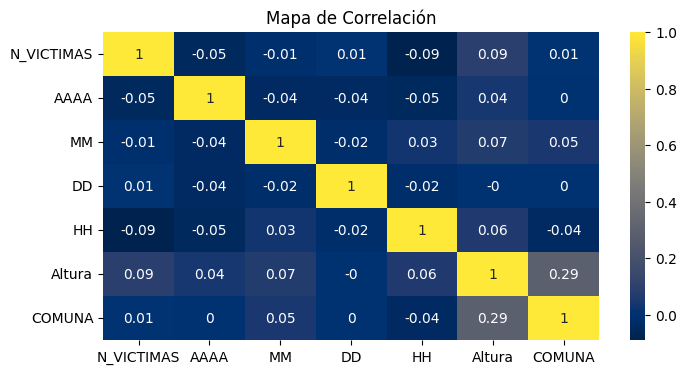

In [38]:
corr = homicidios_df.select_dtypes(include=['number']).corr().round(2)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="cividis", annot=True)
plt.title('Mapa de Correlación')
plt.show()

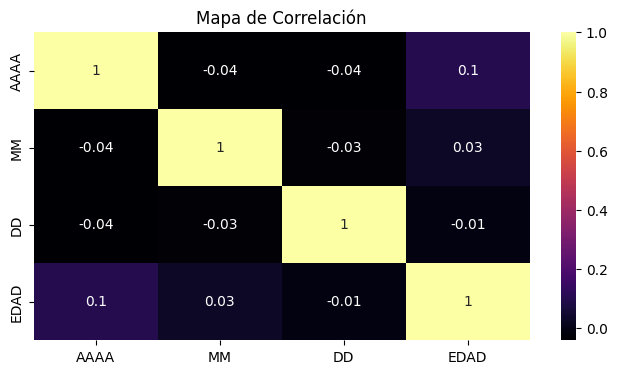

In [39]:
victimas_df['EDAD'] = victimas_df['EDAD'].replace('SD', 0)
victimas_df['EDAD'].astype(int)

corr = victimas_df.select_dtypes(include=['number']).corr().round(2)

plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="inferno", annot=True)
plt.title('Mapa de Correlación')
plt.show()

In [49]:
lesiones_df = pd.read_excel('lesiones.xlsx', sheet_name='HECHOS')
lesiones_vic_df = pd.read_excel('lesiones.xlsx', sheet_name='VICTIMAS')

In [50]:
lesiones_df

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [51]:
lesiones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [53]:
lesiones_df.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

In [54]:
lesiones_df.describe()

,n_victimas,aaaa,mm,dd,altura
count,23785.000000,23785.000000,23785.000000,23785.000000,12771.000000
mean,1.160563,2019.901324,6.597561,15.616355,729.076345
std,0.551571,0.859432,3.476955,8.700047,1734.515099
min,0.000000,2019.000000,1.000000,1.000000,0.000000
25%,1.000000,2019.000000,3.000000,8.000000,0.000000
50%,1.000000,2020.000000,7.000000,16.000000,0.000000
75%,1.000000,2021.000000,10.000000,23.000000,270.000000
max,16.000000,2021.000000,12.000000,31.000000,17700.000000


In [55]:
lesiones_df.duplicated().sum()

0

In [56]:
lesiones_df.isnull().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  5
direccion_normalizada       53
comuna                     169
tipo_calle                   0
otra_direccion               0
calle                    10918
altura                   11014
cruce                    14378
geocodificacion_CABA        39
longitud                   262
latutid                    262
victima                      0
acusado                      0
participantes                0
moto                        93
auto                        93
transporte_publico          93
camion                      93
ciclista                    93
gravedad                     0
dtype: int64

In [57]:
lesiones_vic_df

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


In [58]:
lesiones_vic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID hecho          27605 non-null  object        
 1   AAA               27605 non-null  int64         
 2   MM                27605 non-null  int64         
 3   DD                27605 non-null  int64         
 4   FECHA             27605 non-null  datetime64[ns]
 5   VEHICULO_VICTIMA  27605 non-null  object        
 6   SEXO              27605 non-null  object        
 7   EDAD_VICTIMA      27605 non-null  object        
 8   GRAVEDAD          27605 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [59]:
lesiones_vic_df.describe()

,AAA,MM,DD,FECHA
count,27605.000000,27605.000000,27605.000000,27605
mean,2019.897265,6.618113,15.620721,2020-05-27 17:41:20.289802752
min,2019.000000,1.000000,1.000000,2019-01-01 00:00:00
25%,2019.000000,3.000000,8.000000,2019-07-13 00:00:00
50%,2020.000000,7.000000,16.000000,2020-03-17 00:00:00
75%,2021.000000,10.000000,23.000000,2021-04-05 00:00:00
max,2021.000000,12.000000,31.000000,2021-12-31 00:00:00
std,0.860899,3.479295,8.684067,NaN


In [60]:
lesiones_vic_df.duplicated().sum()

622

In [61]:
lesiones_vic_df.drop_duplicates(inplace=True)

In [62]:
lesiones_vic_df.duplicated().sum()

0

In [63]:
lesiones_vic_df.isnull().sum()

ID hecho            0
AAA                 0
MM                  0
DD                  0
FECHA               0
VEHICULO_VICTIMA    0
SEXO                0
EDAD_VICTIMA        0
GRAVEDAD            0
dtype: int64

In [64]:
lesiones_df.to_csv(os.path.join('datasets_csv', 'lesiones.csv'), index=False)
lesiones_vic_df.to_csv(os.path.join('datasets_csv', 'lesiones_vic.csv'), index=False)